# Import Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seab as sns
from mpl_toolkits.mplot3d import Axes3D
# sns.set()

### Generating Random Input Data to Train on.

In [37]:
observations = 1000
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

inputs = np.column_stack((xs,zs))
inputs

array([[ 4.25335844, -0.67735744],
       [-3.85416195,  1.43167467],
       [-1.55826739, -3.52574713],
       ...,
       [ 8.1684277 ,  5.79959737],
       [-3.43150903,  3.15225613],
       [ 5.74572158, -6.63519693]])

### Generating Targets to Aim at

**I want to "make up" a function f(xs,zs), use the ML methodology, and see if the algorithm has learned it.**

_f(xs,zs) = 2xs - 3zs + 5 + noise_

In [38]:
# I am going to add some noise to the data so as to randomize it

noise = np.random.uniform(-1, 1, (observations,1))
noise.shape

(1000, 1)

In [39]:
# Produce the targets according to the f(x,z) = 2x - 3z + 5 + noise definition.
# I am basically saying: the weights should be 2 and -3, while the bias is 5.

targets = 2*xs - 3*zs + 5 + noise
targets.shape

(1000, 1)

### Ploting the Training Data

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (1000,) and requested shape (1000,1)

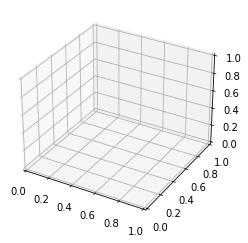

In [42]:
# In order to use the 3D plot, the objects should have a certain shape, so the targets must be reshape
# The proper method to use is reshape and takes as arguments the dimensions in which we want to fit the object.
targets = targets.reshape(observations,)

# Plotting according to the conventional matplotlib.pyplot syntax

# Declaring the figure
fig = plt.figure()

# A method necessary creating the 3D plot
ax = fig.add_subplot(111, projection='3d')

# Choose the axes.
ax.plot(xs, zs, targets)

# Set labels
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

# The azim parameter can be modified to plot the data from different angles. 
# By change the value of azim=100
# to azim = 0 ; azim = 200, or whatever.
ax.view_init(azim=100)

# Display the generated plot
plt.show()

# Reshape the targets back to the shapes they were in before plotting.
# This reshaping is a side-effect of the 3D plot.
targets = targets.reshape(observations,1)

### Initializing Variables

In [43]:
# initialize the weights and biases randomly in some small initial range.
# init_range is the variable that will measure that.
# NB* High initial range values may cause the ML algorithm not to "learn" well

init_range = 0.1 

# Weights are of size k x m, where k and m are the number of input and output variables respectively
# Here, the weights matrix is 2x1 since there are 2 inputs (x and z) and one output (y)

weights = np.random.uniform(low=-init_range, high=init_range, size=(2, 1))

# Biases are of size 1 since there is only 1 output. The bias is a scalar.
biases = np.random.uniform(low=-init_range, high=init_range, size=1)

#Print the weights to get a sense of how they were initialized.
print ("weights", weights, "\n")
print ("biases", biases)

weights [[-0.05328984]
 [-0.08114951]] 

biases [0.04680112]


### Setting the Learning Rate

η(eta) 

In [44]:
# The value for η was randomly choosen 

learning_rate = 0.02

In [45]:
for i in range (100):
    # This is the linear model: y = xw + b equation
    outputs = np.dot(inputs,weights) + biases
    
    # The change (Δ deltas) are the differences between the outputs and the targets
    # Note that deltas here is a vector 1000 x 1
    deltas = outputs - targets
    
    # Using the the L2-norm loss and futher divide by observations to get the mean loss
    loss = np.sum(deltas ** 2) / 2 / observations
    
    print (loss) # See the value of loss function for each iteration
    
    # Scale the deltas the same way as the loss function so that learning rate is 
    # independent of the number of samples (observations).
    deltas_scaled = deltas / observations
    
    # Applying the gradient descent update rules.
    # Weights are 2x1, learning rate is 1x1 (scalar), inputs are 1000x2, and deltas_scaled are 1000x1
    # This implies, the imputs must be Transpose to get an allowed operation.
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)
    
    # The weights are updated in a linear algebraic way (a matrix minus another matrix)
    # The biases, however, are just a single number here, so the deltas must be transform into a scalar.
    # The two lines are both consistent with the gradient descent methodology. 

219549.0717281453
4350328.369209354
1495686746.4658086
539883792185.5854
194903640023584.4
7.036225940920051e+16
2.540151407032936e+19
9.170213158087776e+21
3.3105431877776446e+24
1.195140833610277e+27
4.314583834568613e+29
1.5576100441055806e+32
5.623135724146065e+34
2.0300110089701223e+37
7.328552783893025e+39
2.6456844652065934e+42
9.5511985733658e+44
3.4480829209820886e+47
1.2447941207214e+50
4.4938374119530444e+52
1.6223224667357367e+55
5.856754361150045e+57
2.1143497886624245e+60
7.633024629598786e+62
2.7556019968162384e+65
9.948012397880574e+67
3.5913368760338064e+70
1.2965103018878565e+73
4.680538253369677e+75
1.6897234298375653e+78
6.100078911408317e+80
2.2021925048991935e+83
7.950146053954172e+85
2.8700861590706483e+88
1.03613122382725e+91
3.740542455831303e+93
1.3503750820474492e+96
4.874995762638373e+98
1.7599246314371094e+101
6.353512616517124e+103
2.29368473212853e+106
8.280442595994238e+108
2.989326677076807e+111
1.0791783022088703e+114
3.8959469264071184e+116
1.40647772

In [21]:
# f(x,z) = 2x - 3z + 5 + noise

print ("weights", weights, "\n")
print ("biases", biases)

weights [[2.19621445e+92 2.19621445e+92 2.19621445e+92 ... 2.19621445e+92
  2.19621445e+92 2.19621445e+92]
 [5.53624742e+91 5.53624742e+91 5.53624742e+91 ... 5.53624742e+91
  5.53624742e+91 5.53624742e+91]] 

biases [-1.26650402e+96]


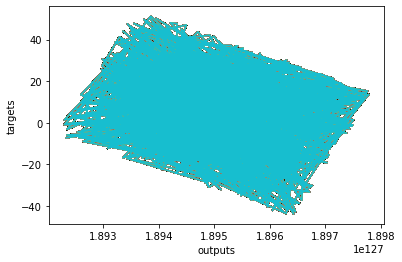

In [46]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()